<a href="https://colab.research.google.com/github/e7tran/CSE158-Assignment2/blob/main/assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
#import kagglehub

# Download latest version
#path = kagglehub.dataset_download("thedevastator/billboard-hot-100-audio-features")

#print("Path to dataset files:", path)

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import Ridge
from sklearn.utils import resample


pd.set_option('display.max_columns', None)

In [53]:
# Load the first CSV
audio_features = pd.read_csv('Hot 100 Audio Features.csv')
print("Hot 100 Audio Features:")
display(audio_features)

# Load the second CSV
hot_stuff = pd.read_csv('Hot Stuff.csv')
print("\nHot Stuff:")
display(hot_stuff)  # Display the first few rows

# Load the second CSV
unrate = pd.read_csv('UNRATE.csv')
print("\nUnemployment Rate:")
display(unrate)  # Display the first few rows

# Load the inflation rate csv
inflation_data = pd.read_csv('inflationrate.csv')
inflation_data['Date'] = pd.to_datetime(inflation_data['DATE'])  # Convert date
inflation_data['Year'] = inflation_data['Date'].dt.year
annual_inflation = inflation_data.groupby('Year')['RATE'].mean().reset_index()
annual_inflation.rename(columns={'RATE': 'Inflation'}, inplace=True)
print("\nAnnual Inflation Rate:")
display(annual_inflation)

Hot 100 Audio Features:


,index,SongID,Performer,Song,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity
0,0,-twistin'-White Silver SandsBill Black's Combo,Bill Black's Combo,-twistin'-White Silver Sands,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,¿Dònde Està Santa Claus? (Where Is Santa Claus...,Augie Rios,¿Dònde Està Santa Claus? (Where Is Santa Claus?),['novelty'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,......And Roses And RosesAndy Williams,Andy Williams,......And Roses And Roses,"['adult standards', 'brill building pop', 'eas...",3tvqPPpXyIgKrm4PR9HCf0,https://p.scdn.co/mp3-preview/cef4883cfd1e0e53...,166106.0,False,The Essential Andy Williams,0.154,0.185,5.0,-14.063,1.0,0.0315,0.91100,0.000267,0.1120,0.150,83.969,4.0,38.0
3,3,...And Then There Were DrumsSandy Nelson,Sandy Nelson,...And Then There Were Drums,"['rock-and-roll', 'space age pop', 'surf music']",1fHHq3qHU8wpRKHzhojZ4a,NaN,172066.0,False,Compelling Percussion,0.588,0.672,11.0,-17.278,0.0,0.0361,0.00256,0.745000,0.1450,0.801,121.962,4.0,11.0
4,4,...Baby One More TimeBritney Spears,Britney Spears,...Baby One More Time,"['dance pop', 'pop', 'post-teen pop']",3MjUtNVVq3C8Fn0MP3zhXa,https://p.scdn.co/mp3-preview/da2134a161f1cb34...,211066.0,False,...Baby One More Time (Digital Deluxe Version),0.759,0.699,0.0,-5.745,0.0,0.0307,0.20200,0.000131,0.4430,0.907,92.960,4.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29498,29498,Zoo YorkLil Tjay Featuring Fivio Foreign & Pop...,Lil Tjay Featuring Fivio Foreign & Pop Smoke,Zoo York,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29499,29499,ZoomFuture,Future,Zoom,"['atl hip hop', 'hip hop', 'pop rap', 'rap', '...",2IG6Te7JyvrtqhFeOF7le4,https://p.scdn.co/mp3-preview/cb8fde6edc08e70a...,278429.0,True,FUTURE,0.852,0.438,9.0,-7.673,1.0,0.4260,0.01450,0.000000,0.2630,0.627,150.945,4.0,51.0
29500,29500,ZoomLil' Boosie Featuring Yung Joc,Lil' Boosie Featuring Yung Joc,Zoom,"['baton rouge rap', 'deep southern trap']",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29501,29501,Zorba The GreekHerb Alpert & The Tijuana Brass,Herb Alpert & The Tijuana Brass,Zorba The Greek,"['adult standards', 'easy listening', 'lounge']",3WLEVNohakzZmMpN5W7mHK,https://p.scdn.co/mp3-preview/1841a4034ba42fc0...,264853.0,False,!!!Going Places!!!,0.531,0.642,5.0,-12.702,1.0,0.3230,0.15400,0.279000,0.0584,0.192,82.107,4.0,35.0



Hot Stuff:


,index,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
0,0,http://www.billboard.com/charts/hot-100/1965-0...,7/17/1965,34,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,45.0,34,4
1,1,http://www.billboard.com/charts/hot-100/1965-0...,7/24/1965,22,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,34.0,22,5
2,2,http://www.billboard.com/charts/hot-100/1965-0...,7/31/1965,14,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,22.0,14,6
3,3,http://www.billboard.com/charts/hot-100/1965-0...,8/7/1965,10,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,14.0,10,7
4,4,http://www.billboard.com/charts/hot-100/1965-0...,8/14/1965,8,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,10.0,8,8
...,...,...,...,...,...,...,...,...,...,...,...
327890,327890,https://www.billboard.com/charts/hot-100/2018-...,10/20/2018,22,God Is A Woman,Ariana Grande,God Is A WomanAriana Grande,1,21.0,8,13
327891,327891,http://www.billboard.com/charts/hot-100/1977-0...,5/21/1977,22,I Wanna Get Next To You,Rose Royce,I Wanna Get Next To YouRose Royce,1,10.0,10,13
327892,327892,http://www.billboard.com/charts/hot-100/1981-0...,5/23/1981,22,I Can't Stand It,Eric Clapton And His Band,I Can't Stand ItEric Clapton And His Band,1,12.0,10,13
327893,327893,http://www.billboard.com/charts/hot-100/1973-0...,9/29/1973,22,Here I Am Come & Take Me,Al Green,Here I Am Come & Take MeAl Green,1,16.0,10,13



Unemployment Rate:


,DATE,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5
...,...,...
917,2024-06-01,4.1
918,2024-07-01,4.3
919,2024-08-01,4.2
920,2024-09-01,4.1



Annual Inflation Rate:


,Year,Inflation
0,1960,1.457976
1,1961,1.070724
2,1962,1.198773
3,1963,1.239669
4,1964,1.278912
...,...,...
59,2019,1.812210
60,2020,1.233584
61,2021,4.697859
62,2022,8.002800


In [55]:
# Count rows with any NaN values
rows_with_nans = audio_features.isnull().any(axis=1).sum()

print(f"Number of rows with NaN values: {rows_with_nans}")


# Count rows with any NaN values
rows_with_nans = hot_stuff.isnull().any(axis=1).sum()

print(f"Number of rows with NaN values: {rows_with_nans}")


Number of rows with NaN values: 15138
Number of rows with NaN values: 31954


In [56]:
display(hot_stuff[hot_stuff.isnull().any(axis=1)])


,index,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
8,8,http://www.billboard.com/charts/hot-100/1997-0...,4/19/1997,97,Don't Keep Wasting My Time,Teddy Pendergrass,Don't Keep Wasting My TimeTeddy Pendergrass,1,NaN,97,1
14,14,http://www.billboard.com/charts/hot-100/1971-0...,4/24/1971,96,Don't Knock My Love - Pt. 1,Wilson Pickett,Don't Knock My Love - Pt. 1Wilson Pickett,1,NaN,96,1
26,26,http://www.billboard.com/charts/hot-100/1974-0...,7/13/1974,90,Don't Knock My Love,Diana Ross & Marvin Gaye,Don't Knock My LoveDiana Ross & Marvin Gaye,1,NaN,90,1
35,35,http://www.billboard.com/charts/hot-100/1981-0...,3/28/1981,90,Don't Know Much,Bill Medley,Don't Know MuchBill Medley,1,NaN,90,1
39,39,http://www.billboard.com/charts/hot-100/1989-0...,9/30/1989,72,Don't Know Much,Linda Ronstadt (Featuring Aaron Neville),Don't Know MuchLinda Ronstadt (Featuring Aaron...,1,NaN,72,1
...,...,...,...,...,...,...,...,...,...,...,...
304028,304028,https://www.billboard.com/charts/hot-100/2018-...,12/1/2018,29,All I Want For Christmas Is You,Mariah Carey,All I Want For Christmas Is YouMariah Carey,8,NaN,29,24
304037,304037,https://www.billboard.com/charts/hot-100/2019-...,12/7/2019,29,Rockin' Around The Christmas Tree,Brenda Lee,Rockin' Around The Christmas TreeBrenda Lee,9,NaN,29,28
304040,304040,https://www.billboard.com/charts/hot-100/2019-...,11/23/2019,39,All I Want For Christmas Is You,Mariah Carey,All I Want For Christmas Is YouMariah Carey,9,NaN,39,30
304049,304049,https://www.billboard.com/charts/hot-100/2020-...,11/28/2020,43,Rockin' Around The Christmas Tree,Brenda Lee,Rockin' Around The Christmas TreeBrenda Lee,10,NaN,43,33


In [57]:
hot_stuff_clean = hot_stuff.drop(columns="Previous Week Position")
display(hot_stuff_clean[hot_stuff_clean.isnull().any(axis=1)])
display(hot_stuff_clean)

,index,url,WeekID,Week Position,Song,Performer,SongID,Instance,Peak Position,Weeks on Chart


,index,url,WeekID,Week Position,Song,Performer,SongID,Instance,Peak Position,Weeks on Chart
0,0,http://www.billboard.com/charts/hot-100/1965-0...,7/17/1965,34,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,34,4
1,1,http://www.billboard.com/charts/hot-100/1965-0...,7/24/1965,22,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,22,5
2,2,http://www.billboard.com/charts/hot-100/1965-0...,7/31/1965,14,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,14,6
3,3,http://www.billboard.com/charts/hot-100/1965-0...,8/7/1965,10,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,10,7
4,4,http://www.billboard.com/charts/hot-100/1965-0...,8/14/1965,8,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,8,8
...,...,...,...,...,...,...,...,...,...,...
327890,327890,https://www.billboard.com/charts/hot-100/2018-...,10/20/2018,22,God Is A Woman,Ariana Grande,God Is A WomanAriana Grande,1,8,13
327891,327891,http://www.billboard.com/charts/hot-100/1977-0...,5/21/1977,22,I Wanna Get Next To You,Rose Royce,I Wanna Get Next To YouRose Royce,1,10,13
327892,327892,http://www.billboard.com/charts/hot-100/1981-0...,5/23/1981,22,I Can't Stand It,Eric Clapton And His Band,I Can't Stand ItEric Clapton And His Band,1,10,13
327893,327893,http://www.billboard.com/charts/hot-100/1973-0...,9/29/1973,22,Here I Am Come & Take Me,Al Green,Here I Am Come & Take MeAl Green,1,10,13


In [58]:
hot_features = hot_stuff_clean.merge(audio_features, on=["SongID", "Performer", "Song"], how="left")
hot_features

,index_x,url,WeekID,Week Position,Song,Performer,SongID,Instance,Peak Position,Weeks on Chart,index_y,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity
0,0,http://www.billboard.com/charts/hot-100/1965-0...,7/17/1965,34,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,34,4,5857.0,['deep adult standards'],1YhNCQ3XOdTCZgubfX8PgB,NaN,163160.0,False,Lost Hits Of The 60's (All Original Artists & ...,0.574,0.256,7.0,-15.044,1.0,0.0298,0.6100,0.000077,0.1000,0.568,82.331,3.0,21.0
1,1,http://www.billboard.com/charts/hot-100/1965-0...,7/24/1965,22,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,22,5,5857.0,['deep adult standards'],1YhNCQ3XOdTCZgubfX8PgB,NaN,163160.0,False,Lost Hits Of The 60's (All Original Artists & ...,0.574,0.256,7.0,-15.044,1.0,0.0298,0.6100,0.000077,0.1000,0.568,82.331,3.0,21.0
2,2,http://www.billboard.com/charts/hot-100/1965-0...,7/31/1965,14,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,14,6,5857.0,['deep adult standards'],1YhNCQ3XOdTCZgubfX8PgB,NaN,163160.0,False,Lost Hits Of The 60's (All Original Artists & ...,0.574,0.256,7.0,-15.044,1.0,0.0298,0.6100,0.000077,0.1000,0.568,82.331,3.0,21.0
3,3,http://www.billboard.com/charts/hot-100/1965-0...,8/7/1965,10,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,10,7,5857.0,['deep adult standards'],1YhNCQ3XOdTCZgubfX8PgB,NaN,163160.0,False,Lost Hits Of The 60's (All Original Artists & ...,0.574,0.256,7.0,-15.044,1.0,0.0298,0.6100,0.000077,0.1000,0.568,82.331,3.0,21.0
4,4,http://www.billboard.com/charts/hot-100/1965-0...,8/14/1965,8,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,8,8,5857.0,['deep adult standards'],1YhNCQ3XOdTCZgubfX8PgB,NaN,163160.0,False,Lost Hits Of The 60's (All Original Artists & ...,0.574,0.256,7.0,-15.044,1.0,0.0298,0.6100,0.000077,0.1000,0.568,82.331,3.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330456,327890,https://www.billboard.com/charts/hot-100/2018-...,10/20/2018,22,God Is A Woman,Ariana Grande,God Is A WomanAriana Grande,1,8,13,8432.0,"['dance pop', 'pop', 'post-teen pop']",67kQ3UW7saqCFqB54BVKKI,NaN,213068.0,False,k bye for now (swt live),0.602,0.658,1.0,-5.934,1.0,0.0558,0.0233,0.000060,0.2370,0.268,145.031,4.0,62.0
330457,327891,http://www.billboard.com/charts/hot-100/1977-0...,5/21/1977,22,I Wanna Get Next To You,Rose Royce,I Wanna Get Next To YouRose Royce,1,10,13,11444.0,"['classic soul', 'disco', 'funk', 'motown', 'p...",1rff5WJrSljfCLYFoXkDiT,NaN,238200.0,False,Car Wash,0.620,0.179,0.0,-19.981,1.0,0.0314,0.8350,0.030000,0.0928,0.675,130.864,4.0,51.0
330458,327892,http://www.billboard.com/charts/hot-100/1981-0...,5/23/1981,22,I Can't Stand It,Eric Clapton And His Band,I Can't Stand ItEric Clapton And His Band,1,10,13,10590.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
330459,327893,http://www.billboard.com/charts/hot-100/1973-0...,9/29/1973,22,Here I Am Come & Take Me,Al Green,Here I Am Come & Take MeAl Green,1,10,13,9589.0,"['classic soul', 'funk', 'memphis soul', 'quie...",20wu6USlvWRghMOvUdfLgE,https://p.scdn.co/mp3-preview/37dbfd6ef26ecbbd...,256693.0,False,Call Me,0.815,0.388,11.0,-12.238,0.0,0.0364,0.3180,0.000084,0.0673,0.846,94.558,4.0,52.0


In [59]:
# Perform an outer merge with an indicator column
comparison = hot_features.merge(
    hot_stuff_clean,
    on=["SongID", "Performer", "Song"],
    how="outer",
    indicator=True
)

# Filter rows that are different based on the merge
different_rows = comparison[comparison['_merge'] != 'both']

# Display the rows that differ
print(f"Number of differing rows: {len(different_rows)}")
display(different_rows)


Number of differing rows: 0


,index_x,url_x,WeekID_x,Week Position_x,Song,Performer,SongID,Instance_x,Peak Position_x,Weeks on Chart_x,index_y,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity,index,url_y,WeekID_y,Week Position_y,Instance_y,Peak Position_y,Weeks on Chart_y,_merge


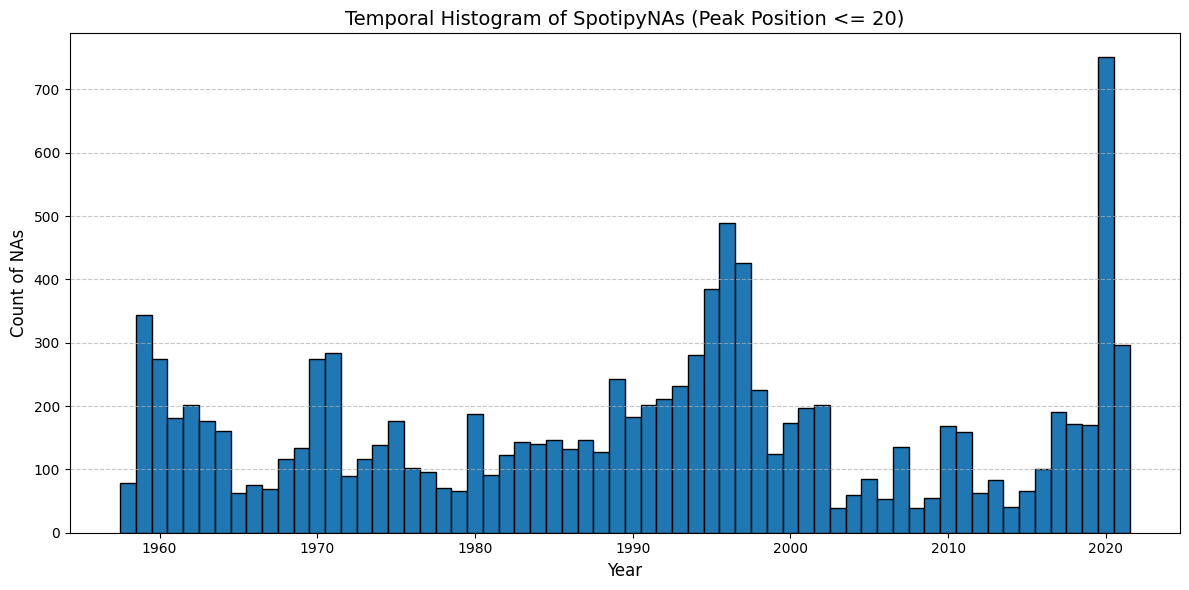

In [60]:
na_rows = hot_features[hot_features["spotify_track_id"].isnull()]

# Filter rows where "Peak Position" <= 20 and "spotify_track_id" is NaN
filtered_na_rows = na_rows[na_rows["Peak Position"] <= 20]

# Group by "WeekID" and count the number of NaN rows per group
filtered_summary = filtered_na_rows.groupby("WeekID").size().reset_index(name="NAs")

# Ensure "WeekID" is in datetime format
filtered_summary['WeekID'] = pd.to_datetime(filtered_summary['WeekID'])

# Create a new column for the year
filtered_summary['Year'] = filtered_summary['WeekID'].dt.year

# Group by year and sum up the "NAs"
yearly_filtered_summary = filtered_summary.groupby('Year')['NAs'].sum().reset_index()

# Plot the histogram
plt.figure(figsize=(12, 6))
plt.bar(yearly_filtered_summary['Year'], yearly_filtered_summary['NAs'], width=1, edgecolor="black")
plt.title('Temporal Histogram of SpotipyNAs (Peak Position <= 20)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count of NAs', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [61]:
# Filter rows where "spotify_track_id" is not null
not_null_rows = hot_features[hot_features["spotify_track_id"].notnull()]

# List of columns to check
columns_to_check = [
    "danceability", "energy", "key", "loudness", "mode",
    "speechiness", "acousticness", "instrumentalness",
    "liveness", "valence", "tempo", "time_signature"
]

# Calculate NaN rates for the specified columns
na_rates = not_null_rows[columns_to_check].isnull().mean()

# Print NaN rates for all columns
print("NaN Rates for Specified Columns:")
for column, rate in na_rates.items():
    print(f"{column}: {rate*len(not_null_rows)}")

NaN Rates for Specified Columns:
danceability: 592.0
energy: 592.0
key: 592.0
loudness: 592.0
mode: 592.0
speechiness: 592.0
acousticness: 592.0
instrumentalness: 592.0
liveness: 592.0
valence: 592.0
tempo: 592.0
time_signature: 592.0


In [62]:
# List of columns to check
columns_to_check = [
    "danceability", "energy", "key", "loudness", "mode",
    "speechiness", "acousticness", "instrumentalness",
    "liveness", "valence", "tempo", "time_signature"
]

# Filter rows where all the specified columns are NaN
rows_with_no_data = not_null_rows[not_null_rows[columns_to_check].isnull().all(axis=1)]

# Display rows with no data
print(f"Number of rows with no data in these columns: {len(rows_with_no_data)}")
display(rows_with_no_data)


Number of rows with no data in these columns: 592


,index_x,url,WeekID,Week Position,Song,Performer,SongID,Instance,Peak Position,Weeks on Chart,index_y,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity
265,264,http://www.billboard.com/charts/hot-100/1993-0...,3/6/1993,68,Nothin' My Love Can't Fix,Joey Lawrence,Nothin' My Love Can't FixJoey Lawrence,1,68,1,17830.0,[],15ni9ro5GuIad268WAZN32,NaN,243266.0,False,Joey Lawrence,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0
414,412,http://www.billboard.com/charts/hot-100/2003-1...,11/15/2003,54,Change Clothes,JAY-Z,Change ClothesJAY-Z,1,54,1,3986.0,"['east coast hip hop', 'hip hop', 'pop rap', '...",1xE7osYAtzz1PvLoVdOp5E,NaN,258426.0,True,The Black Album,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.0
476,473,http://www.billboard.com/charts/hot-100/2007-1...,10/20/2007,55,Blue Magic,JAY-Z,Blue MagicJAY-Z,1,55,1,2942.0,"['east coast hip hop', 'hip hop', 'pop rap', '...",3E8mkgsexzpLBGd6o4iCGC,NaN,248920.0,True,American Gangster,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.0
1672,1664,http://www.billboard.com/charts/hot-100/2002-1...,10/26/2002,56,'03 Bonnie & Clyde,Jay-Z Featuring Beyonce Knowles,'03 Bonnie & ClydeJay-Z Featuring Beyonce Knowles,1,56,1,6.0,"['east coast hip hop', 'hip hop', 'pop rap', '...",5ljCWsDlSyJ41kwqym2ORw,NaN,205560.0,True,The Blueprint 2 The Gift & The Curse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.0
1685,1677,http://www.billboard.com/charts/hot-100/2017-0...,7/29/2017,56,Smile,JAY-Z Featuring Gloria Carter,SmileJAY-Z Featuring Gloria Carter,1,56,1,21837.0,"['east coast hip hop', 'hip hop', 'pop rap', '...",2tqoJQbv6dNNOi0PCCjuse,NaN,289853.0,True,04:44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328010,325457,http://www.billboard.com/charts/hot-100/2004-0...,7/3/2004,64,Got It Twisted,Mobb Deep,Got It TwistedMobb Deep,1,64,12,8723.0,"['east coast hip hop', 'gangster rap', 'hardco...",2nzFiCB8YoXf24MAM1qDmU,https://p.scdn.co/mp3-preview/0bb55a2fef01b04b...,224626.0,True,Amerikaz Nightmare,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0
328447,325891,http://www.billboard.com/charts/hot-100/1959-0...,4/11/1959,82,First Anniversary,Cathy Carr,First AnniversaryCathy Carr,1,42,12,7295.0,['deep adult standards'],1FA5uWmemgXka3AR6CjLeX,https://p.scdn.co/mp3-preview/f2559e04d4acb4de...,144718.0,False,Teenage Girls! Old Enough To Rock,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
329464,326903,http://www.billboard.com/charts/hot-100/2013-1...,10/19/2013,7,Holy Grail,Jay Z Featuring Justin Timberlake,Holy GrailJay Z Featuring Justin Timberlake,1,4,13,9979.0,"['east coast hip hop', 'hip hop', 'pop rap', '...",1q9bLSeIlGf2xBvbOkp2Wr,NaN,338413.0,True,Magna Carta... Holy Grail,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.0
329857,327294,http://www.billboard.com/charts/hot-100/2001-0...,1/20/2001,12,I Just Wanna Love U (Give It 2 Me),JAY-Z,I Just Wanna Love U (Give It 2 Me)JAY-Z,1,11,13,11013.0,"['east coast hip hop', 'hip hop', 'pop rap', '...",0s46SltT4On0Z6kglK1I5c,NaN,227866.0,True,The Dynasty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0


<ipython-input-63-27ee9fad068f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rows_with_no_data['WeekID'] = pd.to_datetime(rows_with_no_data['WeekID'])
<ipython-input-63-27ee9fad068f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rows_with_no_data['Year'] = rows_with_no_data['WeekID'].dt.year


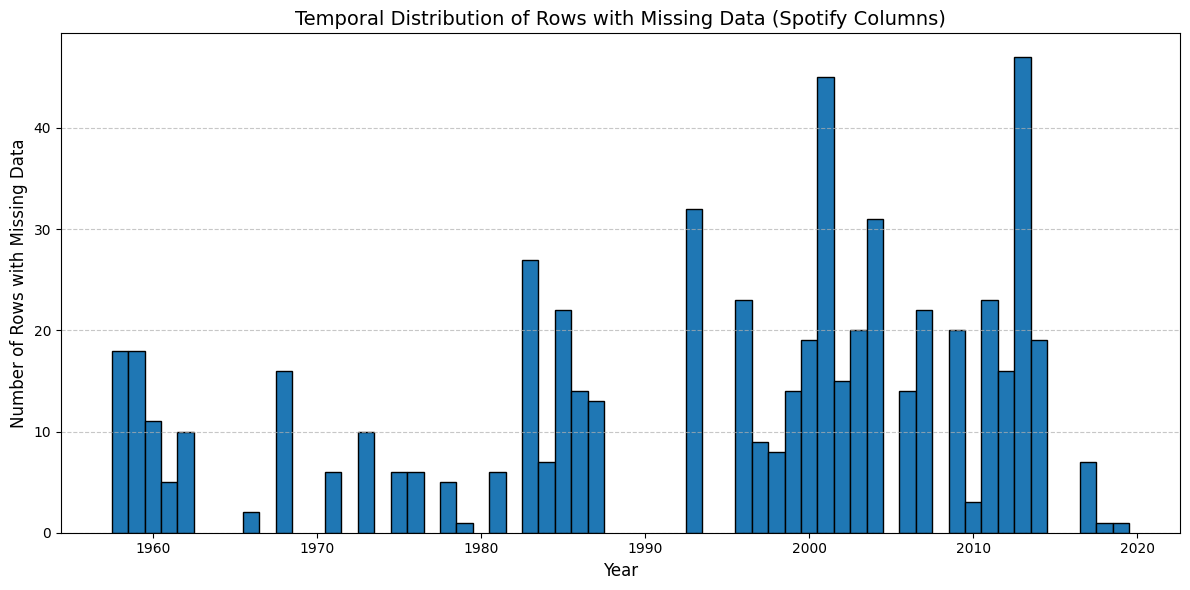

In [63]:
# Ensure "WeekID" is in datetime format for rows_with_no_data
rows_with_no_data['WeekID'] = pd.to_datetime(rows_with_no_data['WeekID'])

# Extract the year for temporal analysis
rows_with_no_data['Year'] = rows_with_no_data['WeekID'].dt.year

# Group by year and count the number of missing rows per year
na_distribution = rows_with_no_data.groupby('Year').size().reset_index(name='Count')

# Plot the histogram
plt.figure(figsize=(12, 6))
plt.bar(na_distribution['Year'], na_distribution['Count'], width=1, edgecolor="black")
plt.title('Temporal Distribution of Rows with Missing Data (Spotify Columns)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Rows with Missing Data', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [64]:
# Filter rows where NOT all specified columns are NaN
non_na_data = not_null_rows[not_null_rows[columns_to_check].notnull().all(axis=1)]

# Display the filtered DataFrame with non-NaN data
print(f"Number of rows with at least some non-NaN data: {len(non_na_data)}")
display(non_na_data)

Number of rows with at least some non-NaN data: 286474


,index_x,url,WeekID,Week Position,Song,Performer,SongID,Instance,Peak Position,Weeks on Chart,index_y,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity
0,0,http://www.billboard.com/charts/hot-100/1965-0...,7/17/1965,34,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,34,4,5857.0,['deep adult standards'],1YhNCQ3XOdTCZgubfX8PgB,NaN,163160.0,False,Lost Hits Of The 60's (All Original Artists & ...,0.574,0.256,7.0,-15.044,1.0,0.0298,0.6100,0.000077,0.1000,0.568,82.331,3.0,21.0
1,1,http://www.billboard.com/charts/hot-100/1965-0...,7/24/1965,22,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,22,5,5857.0,['deep adult standards'],1YhNCQ3XOdTCZgubfX8PgB,NaN,163160.0,False,Lost Hits Of The 60's (All Original Artists & ...,0.574,0.256,7.0,-15.044,1.0,0.0298,0.6100,0.000077,0.1000,0.568,82.331,3.0,21.0
2,2,http://www.billboard.com/charts/hot-100/1965-0...,7/31/1965,14,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,14,6,5857.0,['deep adult standards'],1YhNCQ3XOdTCZgubfX8PgB,NaN,163160.0,False,Lost Hits Of The 60's (All Original Artists & ...,0.574,0.256,7.0,-15.044,1.0,0.0298,0.6100,0.000077,0.1000,0.568,82.331,3.0,21.0
3,3,http://www.billboard.com/charts/hot-100/1965-0...,8/7/1965,10,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,10,7,5857.0,['deep adult standards'],1YhNCQ3XOdTCZgubfX8PgB,NaN,163160.0,False,Lost Hits Of The 60's (All Original Artists & ...,0.574,0.256,7.0,-15.044,1.0,0.0298,0.6100,0.000077,0.1000,0.568,82.331,3.0,21.0
4,4,http://www.billboard.com/charts/hot-100/1965-0...,8/14/1965,8,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,8,8,5857.0,['deep adult standards'],1YhNCQ3XOdTCZgubfX8PgB,NaN,163160.0,False,Lost Hits Of The 60's (All Original Artists & ...,0.574,0.256,7.0,-15.044,1.0,0.0298,0.6100,0.000077,0.1000,0.568,82.331,3.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330453,327887,http://www.billboard.com/charts/hot-100/1967-0...,6/3/1967,22,Don't You Care,The Buckinghams,Don't You CareThe Buckinghams,1,6,13,6091.0,"['brill building pop', 'bubblegum pop', 'class...",7qWwWg1oIczYhL3kVyabG3,https://p.scdn.co/mp3-preview/2ce23e2f868b4a5b...,148800.0,False,"{'album_type': 'album', 'artists': [{'external...",0.410,0.566,6.0,-11.073,0.0,0.0443,0.0967,0.000000,0.2630,0.669,142.037,4.0,38.0
330454,327888,http://www.billboard.com/charts/hot-100/1960-1...,10/29/1960,22,Kiddio,Brook Benton,KiddioBrook Benton,1,7,13,13747.0,"['adult standards', 'brill building pop', 'mot...",7l9RNVHHVgG7mMqnRoEcjL,https://p.scdn.co/mp3-preview/e3c2c9bc503ddc19...,152306.0,False,Brook Benton,0.778,0.290,3.0,-12.873,1.0,0.0625,0.8370,0.000523,0.2100,0.767,112.048,4.0,21.0
330456,327890,https://www.billboard.com/charts/hot-100/2018-...,10/20/2018,22,God Is A Woman,Ariana Grande,God Is A WomanAriana Grande,1,8,13,8432.0,"['dance pop', 'pop', 'post-teen pop']",67kQ3UW7saqCFqB54BVKKI,NaN,213068.0,False,k bye for now (swt live),0.602,0.658,1.0,-5.934,1.0,0.0558,0.0233,0.000060,0.2370,0.268,145.031,4.0,62.0
330457,327891,http://www.billboard.com/charts/hot-100/1977-0...,5/21/1977,22,I Wanna Get Next To You,Rose Royce,I Wanna Get Next To YouRose Royce,1,10,13,11444.0,"['classic soul', 'disco', 'funk', 'motown', 'p...",1rff5WJrSljfCLYFoXkDiT,NaN,238200.0,False,Car Wash,0.620,0.179,0.0,-19.981,1.0,0.0314,0.8350,0.030000,0.0928,0.675,130.864,4.0,51.0


In [ ]:
# Convert dates to datetime format using .loc
non_na_data.loc[:, 'WeekID'] = pd.to_datetime(non_na_data['WeekID'])

# Assign weeks to quarters using .loc
non_na_data.loc[:, 'Month'] = non_na_data['WeekID'].dt.to_period('M')

AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
# Check the range of quarters in non_na_data
min_month = non_na_data['Month'].min()
max_month = non_na_data['Month'].max()

print(f"The range of quarters in weekly data (non_na_data): {min_month} to {max_month}")

unrate['DATE'] = pd.to_datetime(unrate['DATE'])
unrate['Month'] = unrate['DATE'].dt.to_period('M')


# Filter the unrate data to include only quarters in the same range
filtered_unrate = unrate[(unrate['Month'] >= min_month) &
                                 (unrate['Month'] <= max_month)]

print(f"Filtered quarterly data has {len(filtered_unrate)} rows.")
display(filtered_unrate)

KeyError: 'Month'

In [ ]:
# Merge on the quarter column
billspot_unrate = non_na_data.merge(filtered_unrate[['Month', 'UNRATE']], on='Month', how='left').drop_duplicates()

# Display the merged dataset
print(f"Merged dataset has {len(billspot_unrate)} rows.")
display(billspot_unrate)


KeyError: 'Month'

In [ ]:
filtered_unrate

,DATE,UNRATE,Month
127,1958-08-01,7.4,1958-08
128,1958-09-01,7.1,1958-09
129,1958-10-01,6.7,1958-10
130,1958-11-01,6.2,1958-11
131,1958-12-01,6.2,1958-12
...,...,...,...
876,2021-01-01,6.4,2021-01
877,2021-02-01,6.2,2021-02
878,2021-03-01,6.1,2021-03
879,2021-04-01,6.1,2021-04


In [ ]:
import statsmodels.api as sm

# List of columns to calculate monthly averages
columns_to_average = [
    "danceability", "energy", "key", "loudness", "mode",
    "speechiness", "acousticness", "instrumentalness",
    "liveness", "valence", "tempo", "time_signature"
]

monthly_averages = billspot_unrate.groupby('Month')[columns_to_average].mean().reset_index()

X = monthly_averages[columns_to_average].reset_index(drop=True)  # Independent variables
y = filtered_unrate['UNRATE'].reset_index(drop=True)  # Dependent variable

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 UNRATE   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     20.17
Date:                Sat, 30 Nov 2024   Prob (F-statistic):           1.85e-38
Time:                        19:35:19   Log-Likelihood:                -1343.6
No. Observations:                 754   AIC:                             2713.
Df Residuals:                     741   BIC:                             2773.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -12.0143      8.219  

In [ ]:
X

In [66]:
hot_features['WeekID'] = pd.to_datetime(hot_features['WeekID'])
hot_features['Year'] = hot_features['WeekID'].dt.year

annual_audio_features = hot_features.groupby('Year')[columns_to_average].mean().reset_index()
print("Annual Audio Features:")
display(annual_audio_features)

Annual Audio Features:


,Year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,1958,0.545860,0.471431,5.251534,-10.806377,0.881595,0.051397,0.670536,0.062691,0.193292,0.675069,113.894305,3.711656
1,1959,0.528111,0.482844,4.956557,-10.939053,0.842418,0.057691,0.674084,0.070608,0.192840,0.661094,117.717114,3.771722
2,1960,0.516852,0.456821,5.288131,-10.801362,0.859596,0.045528,0.666800,0.070480,0.205267,0.653143,117.358412,3.778030
3,1961,0.531123,0.478718,4.839018,-10.425022,0.871902,0.052219,0.653479,0.087808,0.218387,0.666775,118.861856,3.779632
4,1962,0.542766,0.477447,5.277242,-10.848847,0.864344,0.057662,0.638669,0.071893,0.213591,0.670719,119.262177,3.814430
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,2017,0.682885,0.641847,5.295985,-6.151173,0.642565,0.116469,0.168601,0.004120,0.146380,0.503560,121.453670,3.991397
60,2018,0.687011,0.636133,5.546212,-6.147790,0.667394,0.125148,0.179402,0.003884,0.167008,0.454047,119.607143,3.984728
61,2019,0.693093,0.623126,4.805751,-6.089602,0.655516,0.125736,0.223738,0.007480,0.162145,0.499985,119.556180,3.995599
62,2020,0.664939,0.629994,5.167531,-6.230147,0.608731,0.107855,0.232929,0.004318,0.175762,0.501072,121.678886,3.953070


In [67]:
# Merge annual audio features with annual inflation data
annual_data = annual_audio_features.merge(annual_inflation, on='Year', how='inner').dropna()
print("Combined Annual Data:")
display(annual_data)

Combined Annual Data:


,Year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,Inflation
0,1960,0.516852,0.456821,5.288131,-10.801362,0.859596,0.045528,0.666800,0.070480,0.205267,0.653143,117.358412,3.778030,1.457976
1,1961,0.531123,0.478718,4.839018,-10.425022,0.871902,0.052219,0.653479,0.087808,0.218387,0.666775,118.861856,3.779632,1.070724
2,1962,0.542766,0.477447,5.277242,-10.848847,0.864344,0.057662,0.638669,0.071893,0.213591,0.670719,119.262177,3.814430,1.198773
3,1963,0.539497,0.509577,5.005093,-10.399627,0.863206,0.052374,0.594990,0.064947,0.236044,0.684933,119.044233,3.825612,1.239669
4,1964,0.533910,0.549903,5.026579,-9.927772,0.851256,0.048721,0.541244,0.043150,0.222987,0.687864,119.824307,3.849061,1.278912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,2017,0.682885,0.641847,5.295985,-6.151173,0.642565,0.116469,0.168601,0.004120,0.146380,0.503560,121.453670,3.991397,2.130110
58,2018,0.687011,0.636133,5.546212,-6.147790,0.667394,0.125148,0.179402,0.003884,0.167008,0.454047,119.607143,3.984728,2.442583
59,2019,0.693093,0.623126,4.805751,-6.089602,0.655516,0.125736,0.223738,0.007480,0.162145,0.499985,119.556180,3.995599,1.812210
60,2020,0.664939,0.629994,5.167531,-6.230147,0.608731,0.107855,0.232929,0.004318,0.175762,0.501072,121.678886,3.953070,1.233584


In [70]:
# Define features (X) and target (y)
X = sm.add_constant(annual_data[columns_to_average])  # Add constant for intercept
y = annual_data['Inflation']  # Use inflation rate as the target variable

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
# Establish a baseline MSE for inflation prediction
baseline_mse = mean_squared_error(y_test, np.full(len(y_test), np.average(y_train)))
print(f"Mean Squared Error (baseline): {baseline_mse}")

Mean Squared Error (baseline): 3.0593899482630493


In [ ]:
# AIC-based Stepwise Selection
def stepwise_selection(X, y, direction='forward', criterion='aic'):
    included = []  # Start with no predictors
    while True:
        changed = False
        excluded = list(set(X.columns) - set(included) - {'const'})

        new_candidates = []
        if direction == 'forward':
            for col in excluded:
                model = sm.OLS(y, sm.add_constant(X[included + [col]])).fit()
                new_candidates.append((col, getattr(model, criterion)))

            if new_candidates:
                forward_best = min(new_candidates, key=lambda x: x[1])
                if forward_best[1] < getattr(sm.OLS(y, sm.add_constant(X[included])).fit(), criterion):
                    included.append(forward_best[0])
                    changed = True

        if not changed:
            break

    return included

In [ ]:
# p-value-based Feature Selection (Forward Selection)
def forward_selection(X_train, y_train, significance_level=0.05):
    initial_features = X_train.columns.tolist()
    best_features = []

    while len(initial_features) > 0:
        p_values = []
        for feature in initial_features:
            model = sm.OLS(y_train, X_train[best_features + [feature]]).fit()
            p_values.append(model.pvalues[feature])

        min_p_value = min(p_values)
        if min_p_value < significance_level:
            best_feature = initial_features[p_values.index(min_p_value)]
            best_features.append(best_feature)
            initial_features.remove(best_feature)
        else:
            break
    return best_features

In [ ]:
# Fit the final model using selected features from both methods
X_train_selected_aic = X_train[selected_features_aic]
X_train_selected_pvalue = X_train[best_features_pvalue]

# Fit models
model_aic = sm.OLS(y_train, X_train_selected_aic).fit()
model_pvalue = sm.OLS(y_train, X_train_selected_pvalue).fit()

# Make predictions and evaluate
y_pred_aic = model_aic.predict(X_test[selected_features_aic])
y_pred_pvalue = model_pvalue.predict(X_test[best_features_pvalue])

# Calculate Mean Squared Error (MSE)
mse_aic = mean_squared_error(y_test, y_pred_aic)
mse_pvalue = mean_squared_error(y_test, y_pred_pvalue)

In [ ]:
# Get features selected by AIC-based stepwise selection
selected_features_aic = stepwise_selection(X_train, y_train, criterion='aic')
print("Features selected by AIC-based Stepwise Selection:", selected_features_aic)

# Get features selected by p-value-based selection
best_features_pvalue = forward_selection(X_train, y_train)
print("Final features after p-value selection:", best_features_pvalue)

# Output the results
print("\nAIC-based Model Summary:")
print(model_aic.summary())
print(f"Mean Squared Error (AIC-based model): {mse_aic}")

print("\nP-value-based Model Summary:")
print(model_pvalue.summary())
print(f"Mean Squared Error (p-value-based model): {mse_pvalue}")

# Optionally, scale the features for regularization (if needed)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[best_features])
X_test_scaled = scaler.transform(X_test[best_features])

# Fit and evaluate the model with scaled features if needed (for example, with Ridge regression)
ridge = Ridge(alpha=55)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f"Mean Squared Error (Ridge Regression): {mse_ridge}")

Features selected by AIC-based Stepwise Selection: ['loudness', 'time_signature', 'energy', 'valence', 'mode', 'acousticness', 'speechiness', 'liveness']
Final features after p-value selection: ['loudness', 'liveness', 'valence']

AIC-based Model Summary:
                                 OLS Regression Results                                
Dep. Variable:              Inflation   R-squared (uncentered):                   0.862
Model:                            OLS   Adj. R-squared (uncentered):              0.835
Method:                 Least Squares   F-statistic:                              32.04
Date:                Sat, 30 Nov 2024   Prob (F-statistic):                    2.86e-15
Time:                        19:45:51   Log-Likelihood:                         -98.406
No. Observations:                  49   AIC:                                      212.8
Df Residuals:                      41   BIC:                                      227.9
Df Model:                           8   